Let’s start the project by importing all necessary libraries to load the dataset, perform EDA, and build ML models.

In [1]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

Matplotlib is building the font cache; this may take a moment.


Data Understanding

Let’s load all the datasets - features, store, and train, in pandas dataframes and join them together.


In [3]:
# Load train dataset
df = pd.read_csv('train.csv')
# Load features dataset and join it with train data
features_df = pd.read_csv('features.csv')
df = pd.merge(df, features_df.drop(['IsHoliday'], axis = 1), how = 'left', on = ['Store', 'Date'])
# Load store dataset and join with above data
stores_df = pd.read_csv('stores.csv')
df = pd.merge(df, stores_df, how = 'left', on = ['Store'])

df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


 Let's explore variables, their data types, and total non-null values

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


this dataset has 16 features, with a mix of categorical and numerical features. Some features, such as markdown1-5, contain NULL values.

Exploratory data Analysis
 Find the summary statsistics of the numerical features in the dataset
 

In [5]:
# summary statistics of the dataset
df[['Weekly_Sales', 'Temperature', 'CPI', 'Size']].describe()


,Weekly_Sales,Temperature,CPI,Size
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,60.090059,171.201947,136727.915739
std,22711.183519,18.447931,39.159276,60980.583328
min,-4988.940000,-2.060000,126.064000,34875.000000
25%,2079.650000,46.680000,132.022667,93638.000000
50%,7612.030000,62.090000,182.318780,140167.000000
75%,20205.852500,74.280000,212.416993,202505.000000
max,693099.360000,100.140000,227.232807,219622.000000


The Average weekly sales are 16k , the avaerage CPI is 171, and the size of the store is 137627

Let’s explore the range of dates for which weekly sales data is available. This data contains weekly sales figures from Feb 2010 to Oct 2012

In [6]:
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))


Min Date in Data is - 2010-02-05
Max Date in Data is - 2012-10-26


This data contains weekly sales figures from Feb 2010 to Oct 2012

This dataset contains weekly sales figures for 45 stores. Let’s explore the distribution of the store type among these 45 stores.

  Type  Store
0    A     22
1    B     17
2    C      6


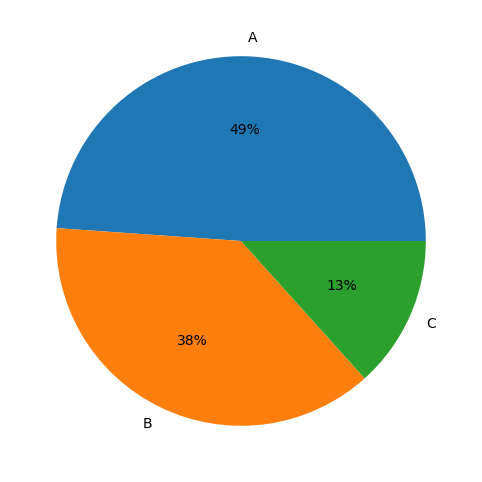

In [7]:
temp = pd.DataFrame(df.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (12,6))
plt.pie(temp['Store'], labels = temp['Type'], autopct = '%.0f%%')
plt.show()


There are a total of 3 store types - A having a share of 49% of total stores, B having a share of 38% of total stores, and C having a share of 13% of total stores.

Let’s explore the size distribution of stores for each store type.

<Axes: xlabel='Type', ylabel='Size'>

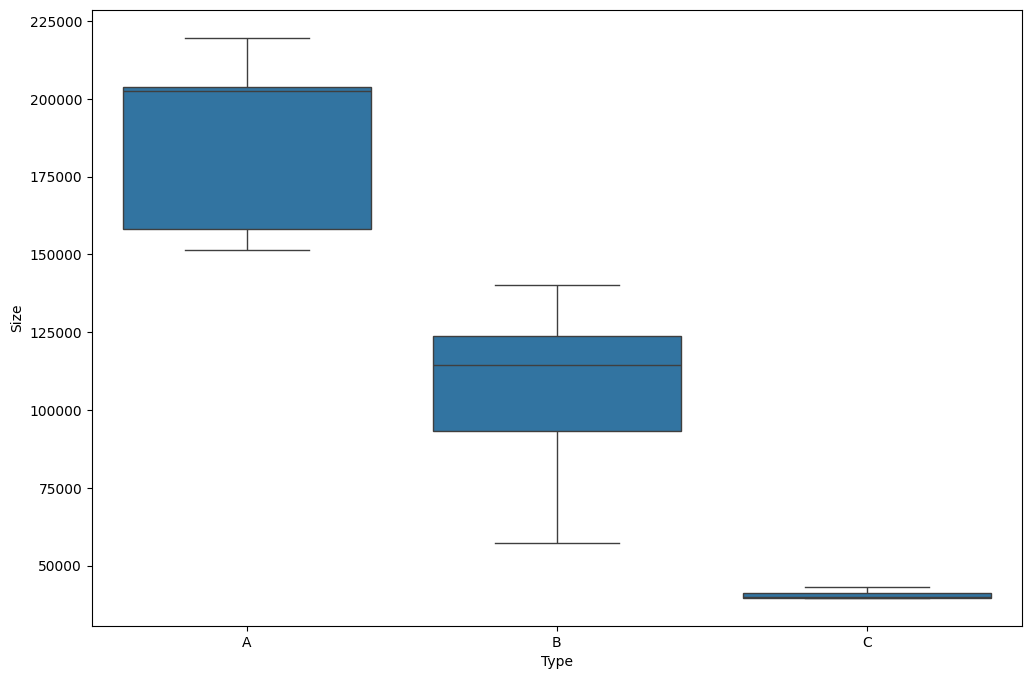

In [8]:
# size distribution of stores for each store type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Size', data = df, showfliers = False)


Let’s explore the distribution of weekly sales for each store type using box plots.

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

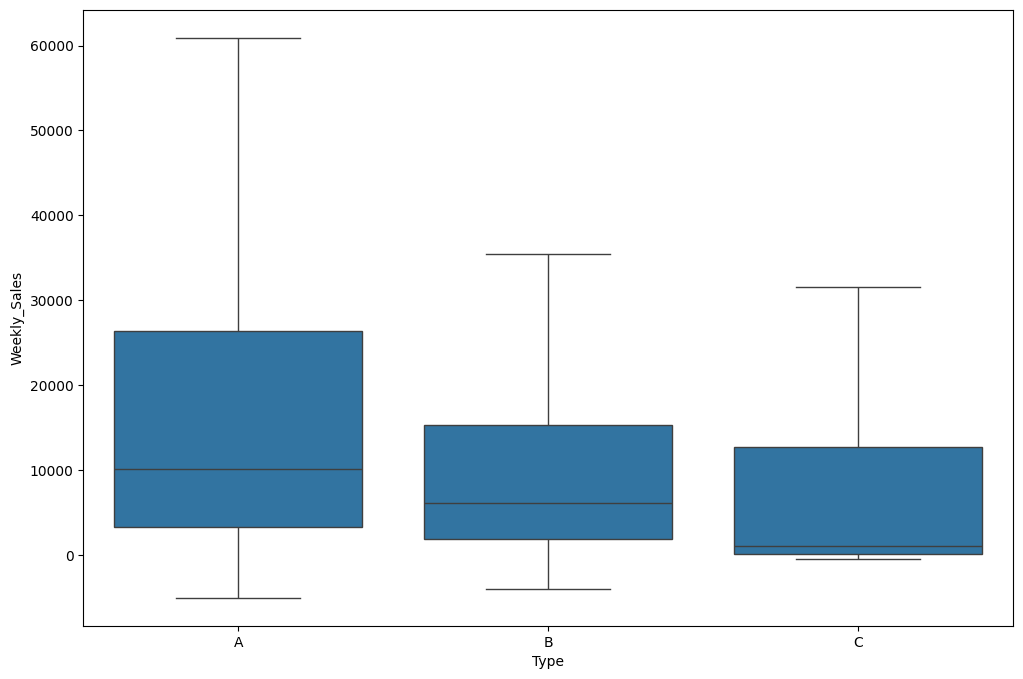

In [9]:
# Distribution of weekly sales based on store type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Weekly_Sales', data = df, showfliers = False)


Weekly sales are on the higher side for A compared with B and C.

Let’s explore how holidays affect the sales of each store.

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

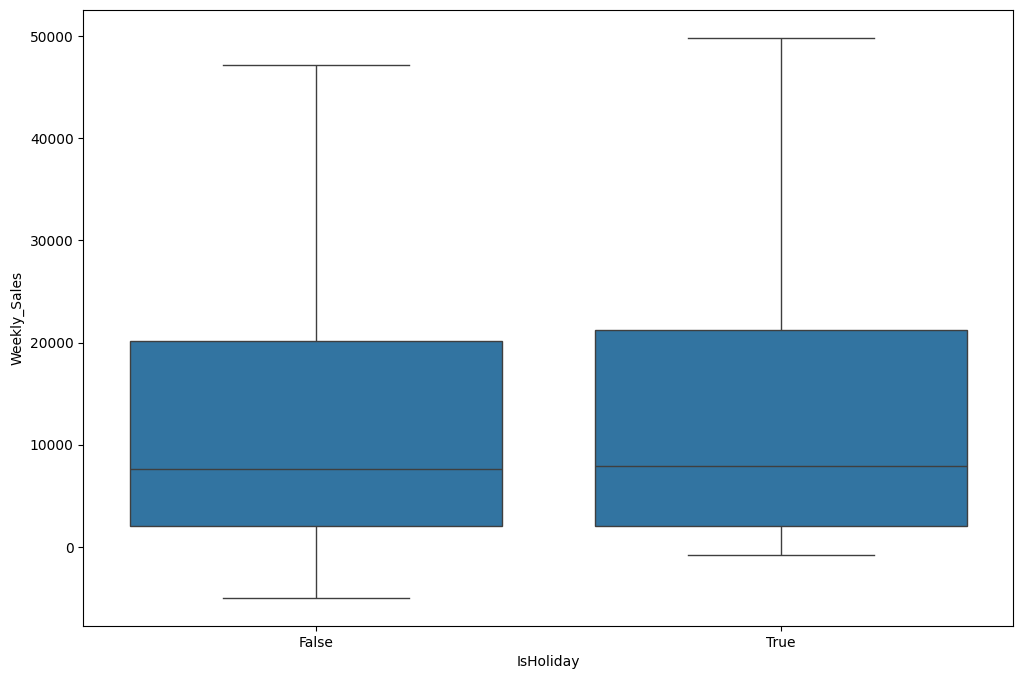

In [10]:
# impact of holidays on weekly sales
plt.figure(figsize = (12,8))
sns.boxplot(x = 'IsHoliday', y ='Weekly_Sales', data = df, showfliers = False)


there is no major impact observed of holidays on weekly sales figures.

Let’s analyze the correlation between numerical features and weekly sales using a heatmap.

<Axes: >

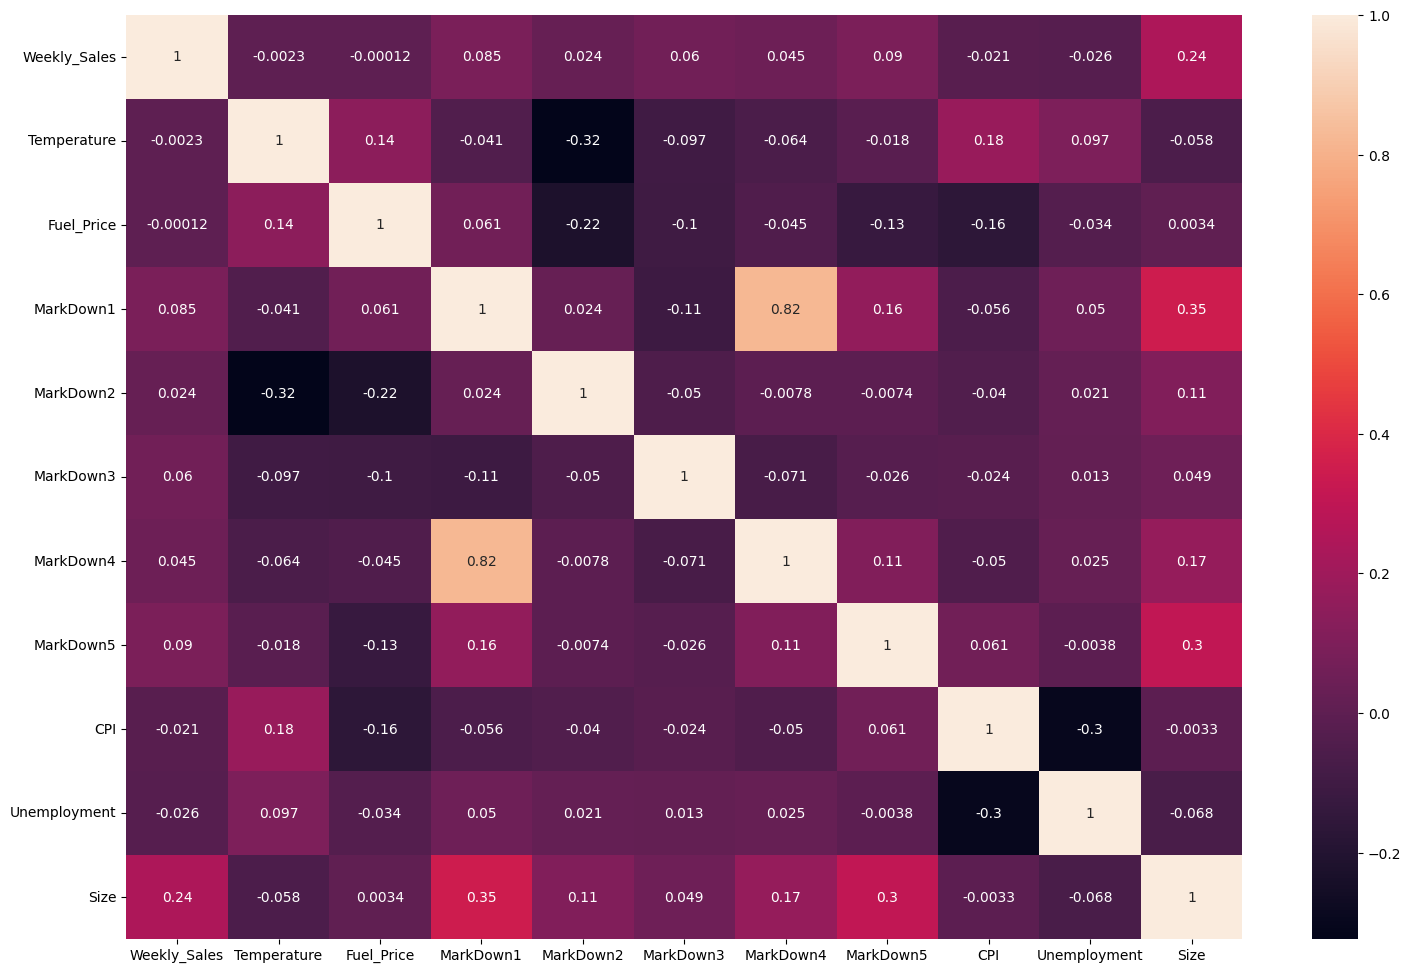

In [11]:
feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)


Weekly sales have the highest correlation of 0.24 with the size of the store, which is in line with our previous findings. The remaining features are mostly uncorrelated with each other, except MarkDown1 has a correlation of 0.84 with Markdown2.

Data Preprocessing
In this stage, we will perform the following steps on the dataset -

1.We will impute NULL values with 0 in MarkDown1-5 features.
2.Create new features year, month, and day from date.
3.Before developing the ML models, we need to hot encode categorical features and standardize numerical features in the dataset. Further, we will split the input data into training and testing data with an 80:20 ratio.

In [12]:
# Impute NULL values
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)

# create year, month, and date
df['Date'] = pd.to_datetime(df['Date'])
df['month_date'] = df['Date'].apply(lambda i : i.month)
df['day_date'] = df['Date'].apply(lambda i : i.day)
df['year_date'] = df['Date'].apply(lambda i : i.year)

# one hot encoding
cols_to_encode = ['Type', 'IsHoliday']
df = pd.get_dummies(data = df, columns = cols_to_encode, drop_first = True)

# Standard Scaler
standard_scaler = StandardScaler()
feature_cols = ['Temperature', 'Fuel_Price', 'MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
transformed_features = standard_scaler.fit_transform(df[feature_cols])

df[feature_cols] = transformed_features

# split data into train and test
feature_cols  = df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['Date', 'Weekly_Sales']]
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['Weekly_Sales'], test_size = 0.2, random_state = 1234)


Developing the ML Models
First, we will train a KNN regression model and evaluate its performance. In this project, we will use the coefficient of determination (accuracy score or r-squared score), mean absolute error (MAE), and root mean squared error (RMSE) scores to compare and evaluate the performance of the ML models.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 10, n_jobs = 4)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {knn_regressor.score(x_test, y_test)}')


MAE is - 8762.91461735892
RMSE is - 15006.052941651613
Accuracy Score is - 0.56866887793634


 the r-squared score is only 0.57

 Let’s plot the scatter plot between observed and predicted values of weekly sales in the test data.

<Axes: xlabel='Weekly_Sales'>

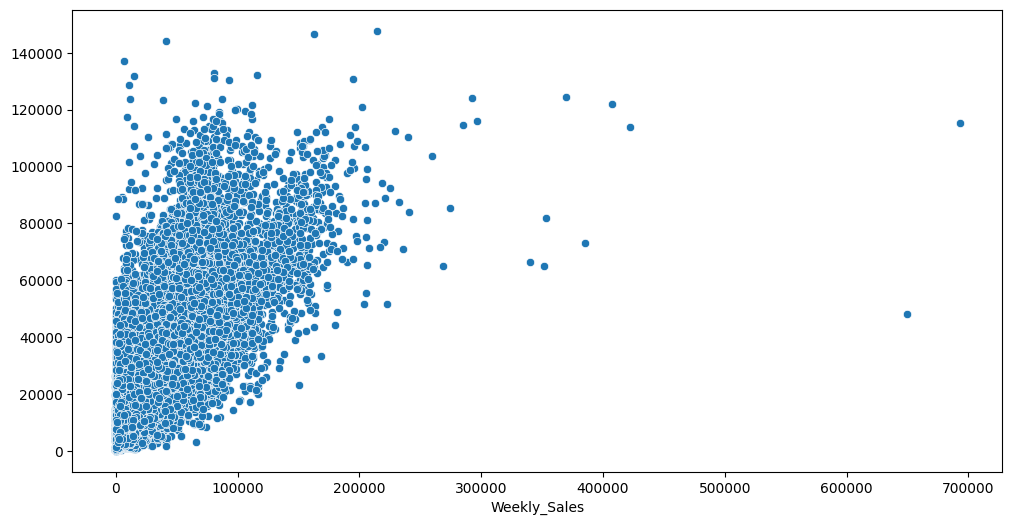

In [14]:
# scatter plot between observed and predicted values of weekly sales from KNN regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)


predicted and observed values have low correlation, and points in the plot are spread out.

 Let’s train a Decision Tree Regressor to check whether we get any improvement in the r-squared score or not.

In [15]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test, y_test)}')


MAE is - 1852.3892947790403
RMSE is - 5252.544430561066
Accuracy Score is - 0.9471533677881446


Decision Tree Regressor, we get a huge improvement in both RMSE and r-squared score. We get an r-squared score of 0.95.

Let’s train a Random Forest Regressor and check whether we get any further improvement.

In [16]:
rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 1234, n_jobs = 5)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')


MAE is - 1946.3719180159421
RMSE is - 4575.375554299849
Accuracy Score is - 0.9599012031970161


We were able to gain slight improvement in RMSE and r-squared score. With Random Forest, we got an r-squared score of 0.96.

Let’s build an XGBoost Regressor in the next step.

In [17]:
xgb_regressor = XGBRegressor(objective = 'reg:linear', n_estimators = 500, max_depth = 6, nthread = 4, learning_rate = 0.5, random_state = 1234)
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {xgb_regressor.score(x_test, y_test)}')


c:\Users\dvkdv\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE is - 2000.5589102001231
RMSE is - 4026.2203064516416
Accuracy Score is - 0.9689491912486072


With XGBoost, we received the highest r-squared score and lowest RMSE. We got an r-squared score of 0.97. 

Let’s plot the scatter plot between observed and predicted values of weekly sales in the test data.

<Axes: xlabel='Weekly_Sales'>

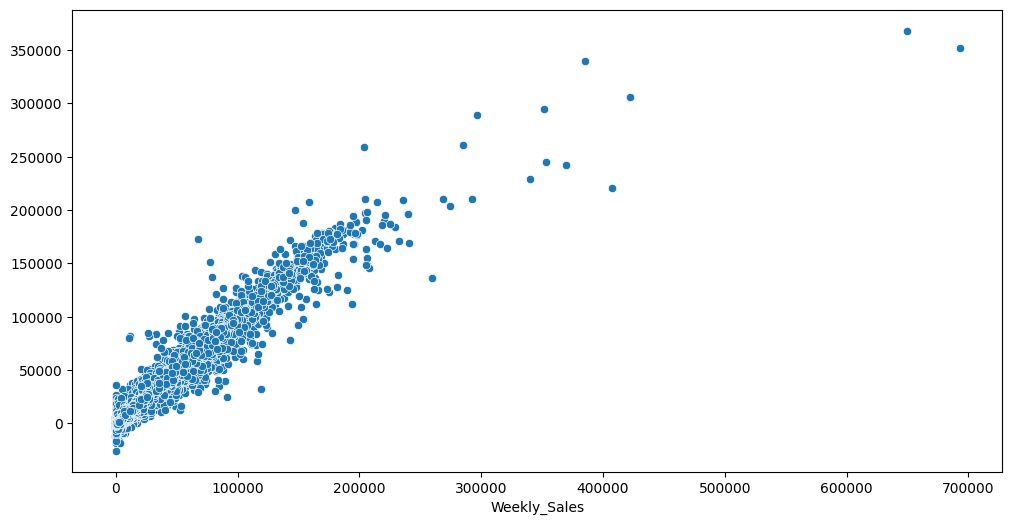

In [18]:
# scatter plot between observed and predicted values of weekly sales from XGBoost regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)


points in the plot are very tightly distributed, and observed and predicted values of weekly sales have a strong correlation.

As you can see, XGBoost has given the highest r-squared score and lowest MAE and RMSE. Thus, we can conclude that for this problem, XGBoost Regressor works best.